In [89]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable

In [90]:
df = pd.read_csv('../output/temp_min.csv')

In [91]:
df['eff_te']=df['te']-df['tb']

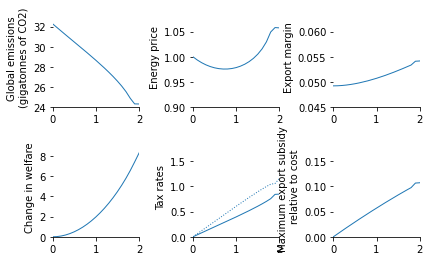

In [92]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,2)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)

ax1.set_ylim(24, 34)
ax2.set_ylim(0.9, 1.1)
ax3.set_ylim(0.045, 0.065)
ax4.set_ylim(0, 10)
ax5.set_ylim(0, 2)
ax6.set_ylim(0, 0.2)

ax1.set_yticks([24,26,28,30,32])
ax2.set_yticks([0.9,0.95,1.0,1.05])
ax3.set_yticks([0.045, 0.050, 0.055, 0.060])
ax4.set_yticks([0,2,4,6,8])
ax5.set_yticks([0,0.5,1,1.5])
ax6.set_yticks([0,0.05,0.1,0.15])

plt.savefig('../plots/fig1_new.pdf', format='PDF')

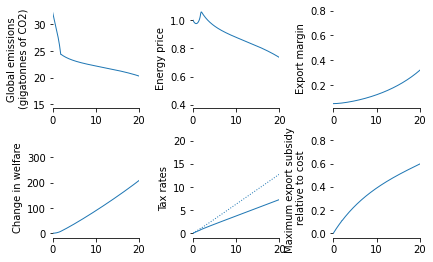

In [93]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,20)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Global emissions \n(gigatonnes of CO2)')
ax2.set_ylabel('Energy price')
ax3.set_ylabel('Export margin')
ax4.set_ylabel('Change in welfare')
ax5.set_ylabel('Tax rates')
ax6.set_ylabel('Maximum export subsidy \nrelative to cost')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Qeworld_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['jxbar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['tb'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['eff_te'], linestyle='dotted', color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['subsidy_ratio'], color='C0',linewidth=1)


plt.savefig('../plots/fig1_big.pdf', format='PDF')

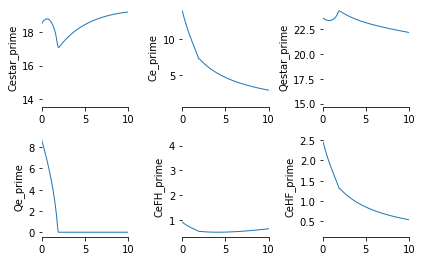

In [94]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.set_position([.1, .6, .2, .35])
ax2.set_position([.425, .6, .2, .35])
ax3.set_position([.75, .6, .2, .35])
ax4.set_position([.1, .15, .2, .35])
ax5.set_position([.425, .15, .2, .35])
ax6.set_position([.75, .15, .2, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,10)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    
ax1.set_ylabel('Cestar_prime')
ax2.set_ylabel('Ce_prime')
ax3.set_ylabel('Qestar_prime')
ax4.set_ylabel('Qe_prime')
ax5.set_ylabel('CeFH_prime')
ax6.set_ylabel('CeHF_prime')

df1=df[(df['tax_sce']=='Unilateral') & (df['region_scenario']==3)]
l1,=ax1.plot(df1['varphi'],df1['Cestar_prime'], color='C0',linewidth=1)
ax2.plot(df1['varphi'],df1['Ce_prime'], color='C0',linewidth=1)
ax3.plot(df1['varphi'],df1['Qestar_prime'], color='C0',linewidth=1)
ax4.plot(df1['varphi'],df1['Qe_prime'], color='C0',linewidth=1)
#ax5.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)
ax5.plot(df1['varphi'],df1['CeFH_prime'], color='C0',linewidth=1)
ax6.plot(df1['varphi'],df1['CeHF_prime'], color='C0',linewidth=1)


plt.savefig('../plots/fig1_othervar.pdf', format='PDF')

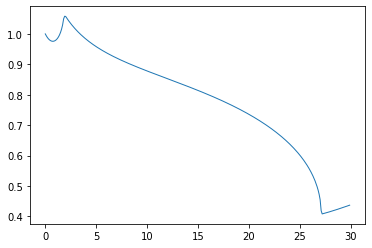

In [95]:
plt.plot(df1['varphi'],df1['pe'], color='C0',linewidth=1)

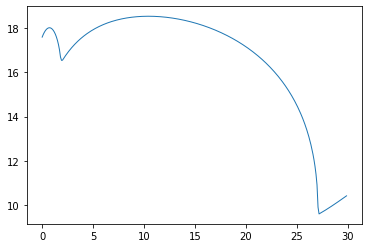

In [96]:
plt.plot(df1['varphi'],df1['CeFF_prime'], color='C0',linewidth=1)

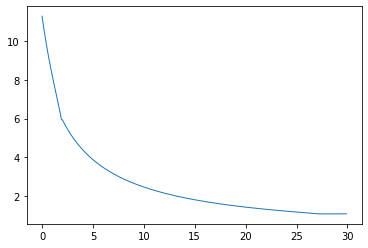

In [97]:
plt.plot(df1['varphi'],df1['CeHH_prime'], color='C0',linewidth=1)